### General rules:
 * Replace *Template* by your *FirstnameLastname* in the filename before submitting the solution.
 * For all figures that you generate, remember to add meaningful labels to the axes, and make a legend, if applicable.
 * Do not hard code constants, like number of samples, number of channels, etc in your program. These values should always be determined from the given data. This way, you can easily use the code to analyse other data sets.
 * Do not use high-level functions from toolboxes like scikit-learn.

# AAND 2019 - BCI Exercise Sheet #01

#### Name: Sudeshna

In [1]:
# This is just a suggestion. You can do it your way.

import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt

import bci_minitoolbox as bci

## Load the data set

In [2]:
fname= 'eyes_closed_VPal.npz'
X, fs, clab, mnt = bci.load_data(fname)
print('There are {} channels with {} samples at a frequency of {}'.format(X.shape[0], X.shape[1], fs))
print('There are {} channel coordinates'.format(mnt.shape))
print('The channel names:')
print(clab)


There are 118 channels with 5958 samples at a frequency of 100
There are (118, 2) channel coordinates
The channel names:
['Fp1', 'AFp1', 'Fpz', 'AFp2', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'FAF5', 'FAF1', 'FAF2', 'FAF6', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FFC7', 'FFC5', 'FFC3', 'FFC1', 'FFC2', 'FFC4', 'FFC6', 'FFC8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'PCP7', 'PCP5', 'PCP3', 'PCP1', 'PCP2', 'PCP4', 'PCP6', 'PCP8', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PPO7', 'PPO5', 'PPO1', 'PPO2', 'PPO6', 'PPO8', 'PO7', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO8', 'OPO1', 'OPO2', 'O1', 'Oz', 'O2', 'OI1', 'OI2', 'I1', 'I2']


## Exercise 1: PCA on raw data  (2 points)
Make a scatter plot using the channels Fz and Oz. Visualize the complete covariance matrix (functions `np.cov` and `pl.imshow`). Then determine the two principle components (Eigenvectors) (function `np.linalg.eigh`) of that data that correspond to the largest Eigenvalues and display them as scalp maps (function `scalpmap` provided in the `bci_minitoolbox`).

In [3]:
Fz_index = clab.index('Fz')
Oz_index = clab.index('Oz')
time = X.shape[1]

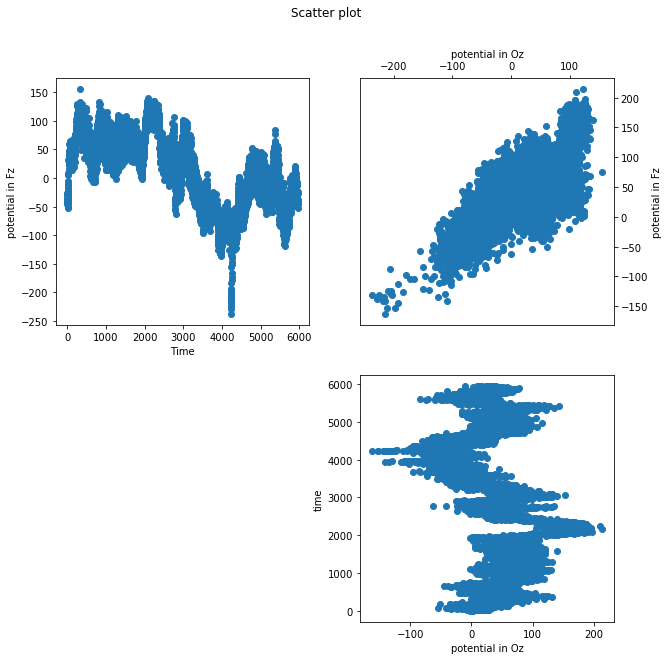

In [4]:
Fz = X[Fz_index, :]
Oz = X[Oz_index, :]


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plt.sca(axs[0, 0])
plt.scatter(np.arange(time),Fz)
plt.ylabel('potential in Fz')
plt.xlabel('Time')

plt.sca(axs[0, 1])
plt.scatter(Fz, Oz)
plt.ylabel('potential in Fz')
plt.xlabel('potential in Oz')
axs[0, 1].xaxis.set_label_position('top')
axs[0, 1].xaxis.tick_top()
axs[0, 1].yaxis.set_label_position('right')
axs[0, 1].yaxis.tick_right()


plt.sca(axs[1, 1])
plt.scatter(Oz, np.arange(time))
plt.ylabel('time')
plt.xlabel('potential in Oz')
axs[1, 1].xaxis.tick_bottom()

plt.sca(axs[1, 0])
axs[1,0].set_axis_off()

plt.suptitle('Scatter plot')
plt.show()

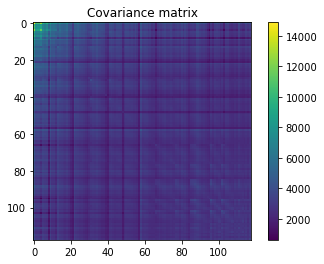

In [5]:
cov_mat = np.cov(X)
plt.imshow(cov_mat)
plt.colorbar()
plt.title('Covariance matrix')
plt.show()

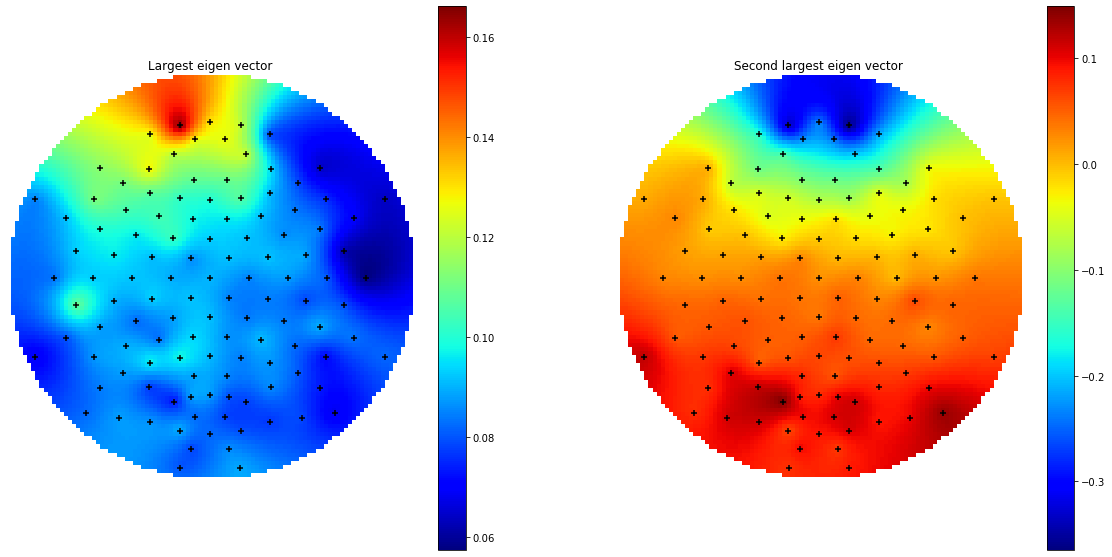

In [6]:
eigval, eigvec = np.linalg.eigh(cov_mat)

pca_val1 = eigvec[:,-1].dot(X)
pca_val2 = eigvec[:,-2].dot(X)


plt.figure(figsize = (20,20))

plt.subplot(1,2,1)
bci.scalpmap(mnt,eigvec[:,-1])
plt.title('Largest eigen vector')

plt.subplot(1,2,2)
bci.scalpmap(mnt,eigvec[:,-2])
plt.title('Second largest eigen vector')
plt.show()

## Exercise 2: Artifact Correction with PCA  (3 points)
Using the backward model, estimate the source activity corresponding to the two components that were found in Ex. \#01 and plot the two obtained time series. Using the forward model, estimate that part of the measured EEG signals, that originates from these two sources. Subtract this multivariate signal from the original EEG. Compare the thus obtained cleaned signal in channel Fz with the original data.

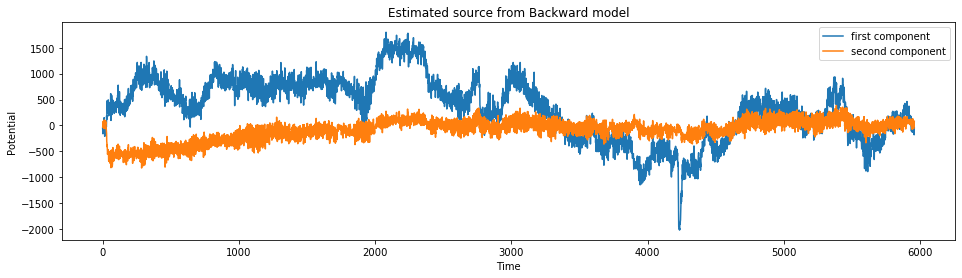

In [7]:
# backward model 
index = [-1, -2]
W = eigvec[:, index] # take the largest eigenvector
estimated_source = np.dot(W.T, X)

plt.figure(figsize=(16,4))
plt.plot(np.arange(time), estimated_source[0,:], label = 'first component')
plt.plot(np.arange(time), estimated_source[1,:], label = 'second component')
plt.title('Estimated source from Backward model')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Potential')
plt.show()

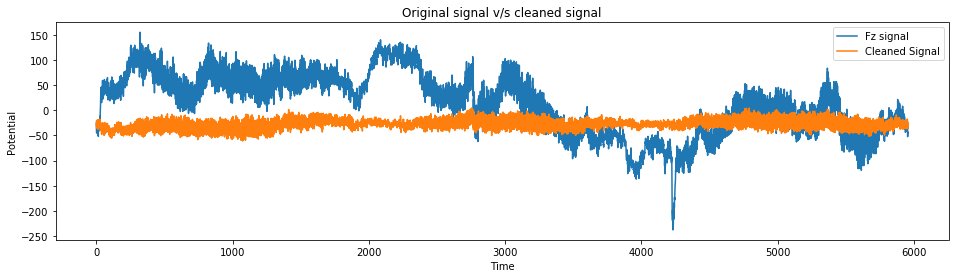

In [8]:
# forward model 
part_of_EEG = np.dot(W, estimated_source)
diff_signal = X - part_of_EEG


plt.figure(figsize=(16,4))
plt.plot(np.arange(time), X[Fz_index, :], label='Fz signal')
plt.plot(np.arange(time), diff_signal[Fz_index, :], label='Cleaned Signal')
plt.title('Original signal v/s cleaned signal')
plt.xlabel('Time')
plt.ylabel('Potential')
plt.legend()
plt.show()

## Exercise 3: PCA on band-pass filtered data (3 points)
Design a butterworth band-pass filter of order 10 with the frequency band 8-12 Hz (function `sp.signal.butter`). Apply that band-pass filter to the original EEG signals (function `sp.signal.lfilter`) and compare raw and filtered signals for channel Oz.
Visualize the covariance matrix of the filtered data and check the eigenvalue spectrum, to determine how many strong principal components there are. Visualize those principal components as in Ex. \#01. Compare the results and discuss shortly.

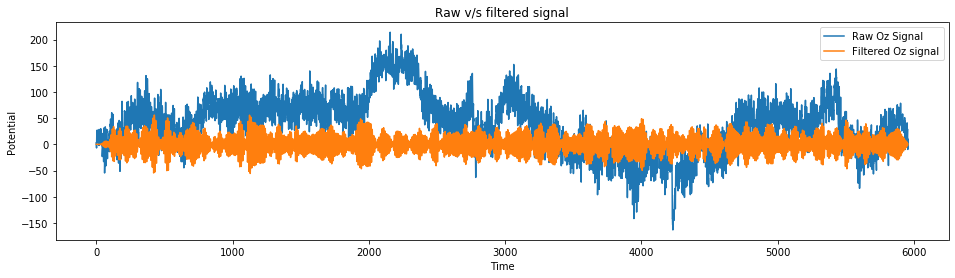

In [9]:
b, a = scipy.signal.butter(10,(8/fs*2,12/fs*2), btype = 'bandpass')
X_filtered = scipy.signal.lfilter(b,a,X)

plt.figure(figsize=(16,4))
plt.plot(np.arange(time), X[Oz_index, :], label='Raw Oz Signal')
plt.plot(np.arange(time), X_filtered[Oz_index, :], label='Filtered Oz signal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Potential')
plt.title('Raw v/s filtered signal')
plt.show()

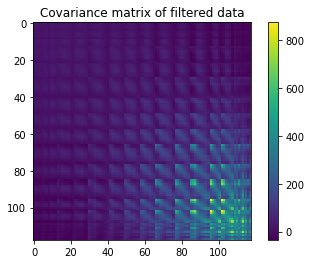

In [10]:
filtered_cov = np.cov(X_filtered)
plt.imshow(filtered_cov)
plt.colorbar()
plt.title('Covariance matrix of filtered data')
plt.show()

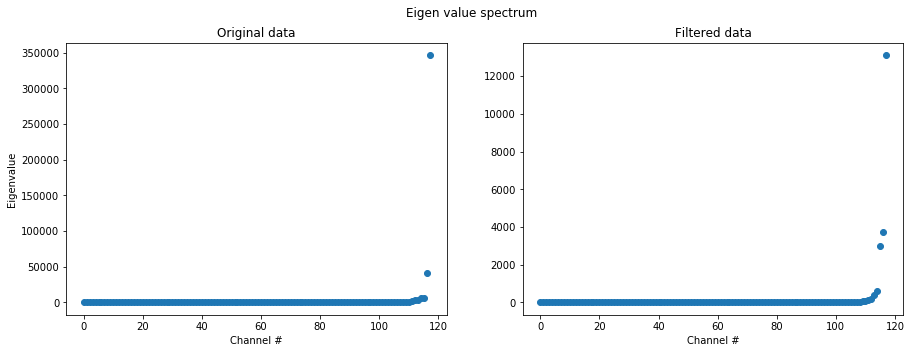

In [11]:
val_filtered , vec_filtered = np.linalg.eigh(filtered_cov)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

plt.sca(axs[0])
plt.plot(eigval, 'o')
plt.title('Original data')
plt.xlabel('Channel #')
plt.ylabel('Eigenvalue')

plt.sca(axs[1])
plt.plot(val_filtered, 'o')
plt.title('Filtered data')
plt.xlabel('Channel #')

plt.suptitle('Eigen value spectrum')
plt.show()

Comparing to the original data, the filtered data has 3 dominant eigen vectors.

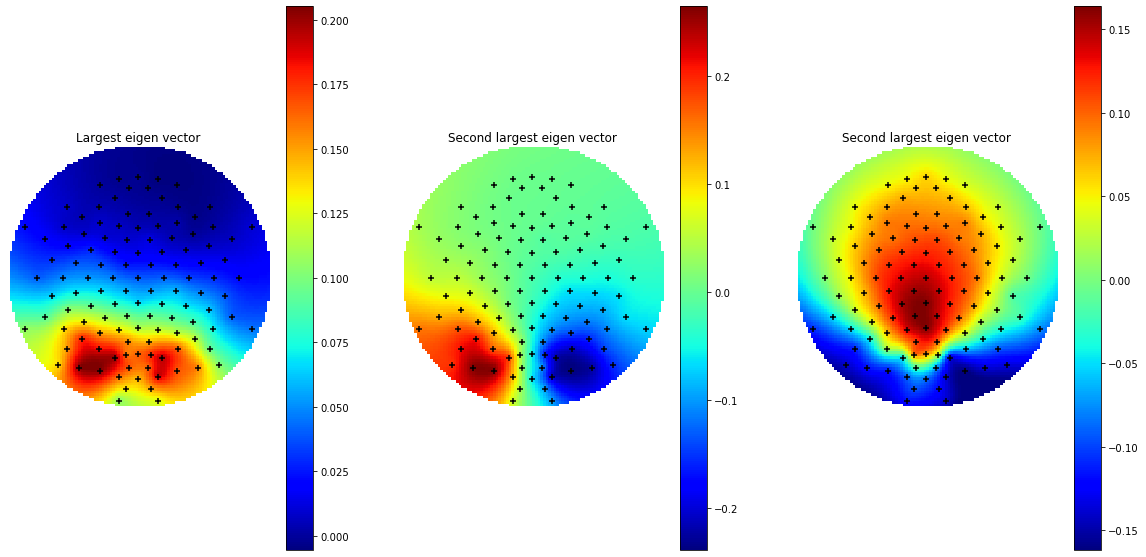

In [12]:
plt.figure(figsize = (20,20))

plt.subplot(1,3,1)
bci.scalpmap(mnt,vec_filtered[:,-1])
plt.title('Largest eigen vector')

plt.subplot(1,3,2)
bci.scalpmap(mnt,vec_filtered[:,-2])
plt.title('Second largest eigen vector')

plt.subplot(1,3,3)
bci.scalpmap(mnt,vec_filtered[:,-3])
plt.title('Second largest eigen vector')

plt.show()

If we compare the reconstruction of the filtered data with the original data, we see that the reconstruction works well. However, the data appears flipped.

## Exercise 4: Reconstruction with few PCs  (2 points)
Calculate the signals corresponding to the strongest principal components (second part of Ex. \#03) of the filtered data (project EEG data onto the PCs, i.e. go from *sensor space* to *source space*). Then reconstruct the EEG data from those strong principal components, i.e. project the signals obtained in the first step back into *sensor space*. Compare the band-pass filtered signal with the reconstructed signal in channel Oz. For plotting, the first six seconds are enough. You can also apply an error measure on your choice.

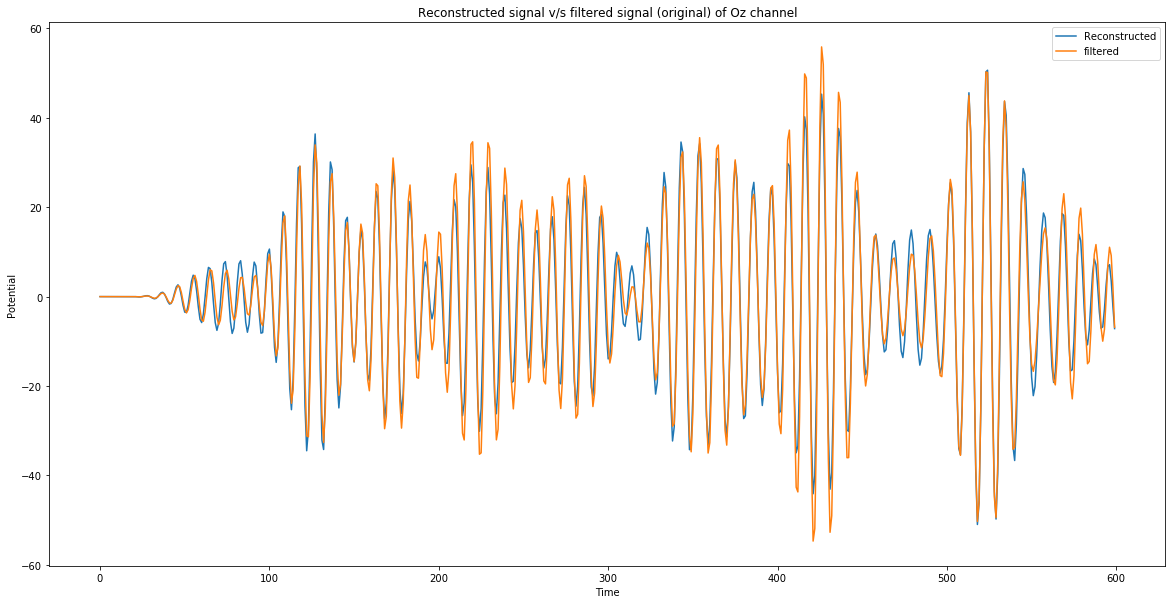

In [13]:
# backward model 
index = [-1, -2, -3]
W = vec_filtered[:, index] # take the largest eigenvector
estimated_source = np.dot(W.T, X_filtered)

part_of_EEG = np.dot(W, estimated_source)

time_limit = 600

plt.figure(figsize=(20,10))
plt.plot(part_of_EEG[Oz_index, :time_limit], label = 'Reconstructed')
plt.plot(X_filtered[Oz_index, :time_limit], label = 'filtered')
plt.xlabel("Time")
plt.ylabel('Potential')
plt.title('Reconstructed signal v/s filtered signal (original) of Oz channel')
plt.legend()
plt.show()


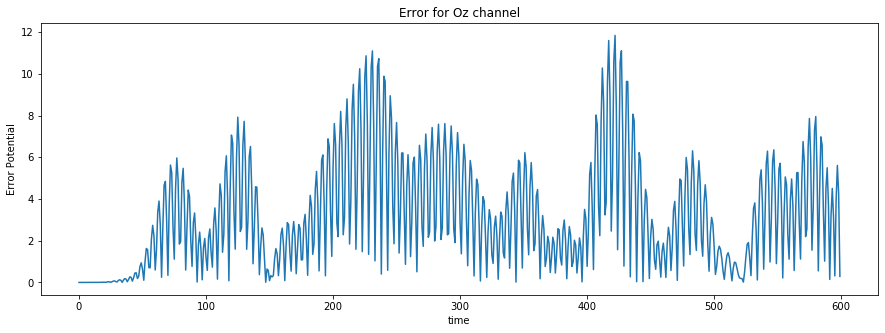

In [14]:
error = np.abs(X_filtered[Oz_index, :time_limit] - part_of_EEG[Oz_index, :time_limit])

plt.figure(figsize=(15,5))
plt.plot(error)
plt.title('Error for Oz channel')
plt.xlabel('time')
plt.ylabel('Error Potential')
plt.show()

In [15]:
print('The mean error is {}'.format(np.mean(error)))

The mean error is 3.1977873014531677
